### Analyzing Human Behaviour Complexity Data

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [478]:
df = pd.read_csv('lifespan.csv', sep=' ')
df.dropna(how='any', inplace=True)
task = 'toss.RT'

## 1. Random sequences by Age

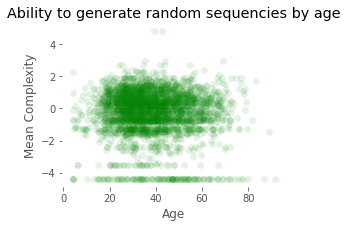

In [479]:
fix, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(df['age'],df['toss.K'],alpha=0.1,c='g')
ax.set_xlabel('Age')
ax.set_ylabel('Mean Complexity')
ax.set_title('Ability to generate random sequencies by age')
ax.grid(True)
ax.set_frame_on(False)

## 2. Design a Binary Classifier
#### Add a column to dataset to define category for Binary Classification
#### 1 for Category 1 (Age 15 to 65) 0 for Category 2 (All other ages)

In [480]:
category = []
for age in df['age']:
    if(age >= 15 and age <= 65):
        category.append(1)
    else:
        category.append(0)

df['category'] = category
df[[task,'age','category']]

,toss.RT,age,category
0,45.1,41.000000,1
1,9.1,42.000000,1
2,6.2,53.000000,1
3,16.3,53.000000,1
4,9.8,49.000000,1
...,...,...,...
3444,12.9,22.326027,1
3445,7.3,15.928767,1
3446,7.2,32.893151,1
3447,11.8,26.764384,1


## Scatter plot to view data distribution
#### Cat 1 The person's ablility to generate sequence between age 15 and 65
#### Cat 2 The person's ablility to generate sequence at all other ages

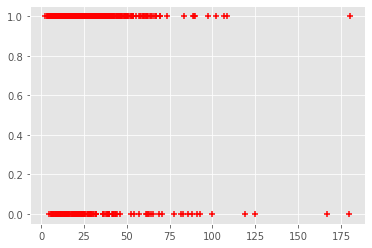

In [481]:
plt.scatter(df[task],df.category,marker='+',color='red')

## Splitting the dataset into Testing and Training datasets

In [482]:
from sklearn.model_selection import train_test_split

In [483]:
X_train, X_test, y_train, y_test = train_test_split(df[[task]],df.category,test_size=0.1)

In [484]:
X_train

,toss.RT
2277,12.0
2229,13.1
2463,28.8
2987,17.5
183,10.0
...,...
1781,5.8
824,22.9
1462,8.1
2712,32.0


In [485]:
X_test

,toss.RT
1176,10.1
264,6.3
912,31.6
1026,29.0
3115,13.6
...,...
1278,13.4
3445,7.3
345,13.0
590,5.0


## Train the model using logistic regression

In [486]:
from sklearn.linear_model import LogisticRegression

In [487]:
model = LogisticRegression()

In [488]:
model.fit(X_train,y_train)

C:\Users\cinni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [489]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Score

In [490]:
model.score(X_test,y_test)

0.9498525073746312

### Check Probability of person's age being in Category 1 (1) and 2 (0)

In [491]:
lr_probs = model.predict_proba(X_test)
lr_probs

array([[0.03914743, 0.96085257],
       [0.03395748, 0.96604252],
       [0.08585652, 0.91414348],
       [0.07825412, 0.92174588],
       [0.04459442, 0.95540558],
       [0.04186396, 0.95813604],
       [0.05772486, 0.94227514],
       [0.09346175, 0.90653825],
       [0.10860737, 0.89139263],
       [0.04627904, 0.95372096],
       [0.03552031, 0.96447969],
       [0.0672664 , 0.9327336 ],
       [0.07468831, 0.92531169],
       [0.04361187, 0.95638813],
       [0.04124512, 0.95875488],
       [0.04170842, 0.95829158],
       [0.06232539, 0.93767461],
       [0.04442921, 0.95557079],
       [0.0592218 , 0.9407782 ],
       [0.06232539, 0.93767461],
       [0.03842335, 0.96157665],
       [0.03958814, 0.96041186],
       [0.04202005, 0.95797995],
       [0.08110236, 0.91889764],
       [0.04679613, 0.95320387],
       [0.03209708, 0.96790292],
       [0.04410053, 0.95589947],
       [0.05965614, 0.94034386],
       [0.05965614, 0.94034386],
       [0.04459442, 0.95540558],
       [0.

### 3. ROC Curve

In [492]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

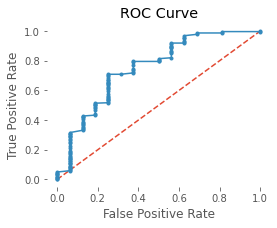

In [493]:
# generate a Cat 1 prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
fix, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(ns_fpr, ns_tpr, linestyle='--')
ax.plot(lr_fpr, lr_tpr, marker='.')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.grid(True)
ax.set_frame_on(False)